Toy example of two independent evidence accumulators implemented through Laplace and inverse Laplace transformation.
    

In [1]:
import random
import numpy as np 
import pylab as pl
from support import Support # Class that implements Laplace and inverse Laplace transfrom

In [2]:
# General set of parameters for implementing the transform
buff_len=70 # Number of nodes in the squence (in the inverse Laplace transfrom (tilde{f}) of the input)
tstr_min=0.1 # Peak time of the first node in the sequence
tstr_max=2 # Peak time of the last node in the squence
k=10 # Order of the detivative in inverse Laplace transfrom, largerl k causes more narrow peaks in tilde{f}
g=1 # Determines amplitude scaling of nodes in tilde{f}: g=1->equal amplitude, g=0->power-law decay of amplitude)
Nt=5000 #Number of time points of the simulation
dt=0.001 #Time step of the simulation

In [3]:
evidence_l = Support(tstr_min, tstr_max, buff_len, k, dt, g, Nt) # Create evidence accumulator 
evidence_r = Support(tstr_min, tstr_max, buff_len, k, dt, g, Nt)

evidence_l.update(time_index=0, f=1) # Initialize by kicking to some value
evidence_r.update(time_index=0, f=1)


In [4]:
e_thr = 0.0013
for time_index in range(1,Nt):
    alpha_l = 0.2 # evidence obtained at this moment in time (in this toy example we set it to a constant)
    alpha_r = 0.4 
    evidence_l.update(time_index, f=0, alpha=alpha_l) # exponential decay modulated by alpha 
    evidence_r.update(time_index, f=0, alpha=alpha_r)
    if evidence_l.til_f[k+buff_len-1, time_index] > e_thr: # check if the last buffer reached the threshold
        ev_l = 1
        break # if yes the evidence accumulation process is over
    if evidence_r.til_f[k+buff_len-1, time_index] > e_thr: 
        ev_r = 1
        break

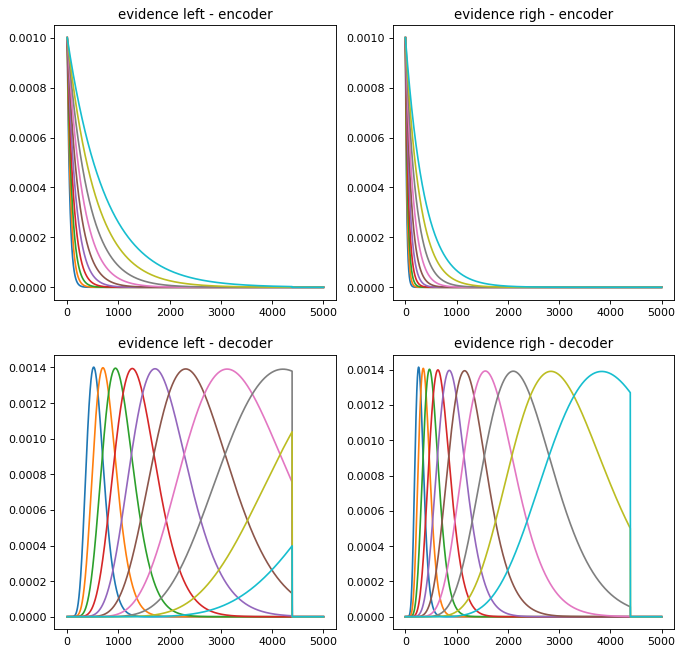

In [5]:
fig = pl.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

ax = pl.subplot(2,2,1)
_ = ax.plot(evidence_l.F[k:-k:7,:].T)
_ =ax.set_title('evidence left - encoder')
ax = pl.subplot(2,2,2)
_ = ax.plot(evidence_r.F[k:-k:7,:].T)
_ = ax.set_title('evidence righ - encoder')

ax = pl.subplot(2,2,3)
_ = ax.plot(evidence_l.til_f[k:-k:7,:].T)
_ =ax.set_title('evidence left - decoder')
ax = pl.subplot(2,2,4)
_ = ax.plot(evidence_r.til_f[k:-k:7,:].T)
_ = ax.set_title('evidence righ - decoder')